## Question 2:  
Carefully explain the differences between the KNN classifier and KNN regression methods.

- The KNN classifier and KNN regression approaches share similarities. In the case of the KNN classifier, it identifies a decision boundary to partition data into two or more clusters or groups. Meanwhile, KNN regression is a non-parametric technique employed for estimating a regression function, enabling the prediction of a quantitative variable.

## Question 9

In [4]:
import numpy as np
import pandas as pd
from scipy import stats

import seaborn as sns; sns.set()
from matplotlib import pyplot as plt

import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.api as sm

from sklearn import datasets
from statsmodels.stats.api import anova_lm 
import seaborn as sns

from statsmodels.sandbox.regression.predstd import wls_prediction_std
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline
plt.style.use('ggplot')

In [ ]:
auto = pd.read_csv('auto.csv')


In [71]:
# Remove missing values
auto = pd.read_csv('Auto.csv', na_values='?').dropna()
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [72]:
# Convert quantitive datatypes to numerics
datatypes = {'quant': ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year'],
             'qual': ['origin', 'name']}

quants = auto[datatypes['quant']].astype(np.float_)

auto = pd.concat([quants, auto[datatypes['qual']]], axis=1) 

(a) Produce a scatterplot matrix which includes all of the variables in the data set.

In [67]:
auto = pd.read_csv('auto.csv')

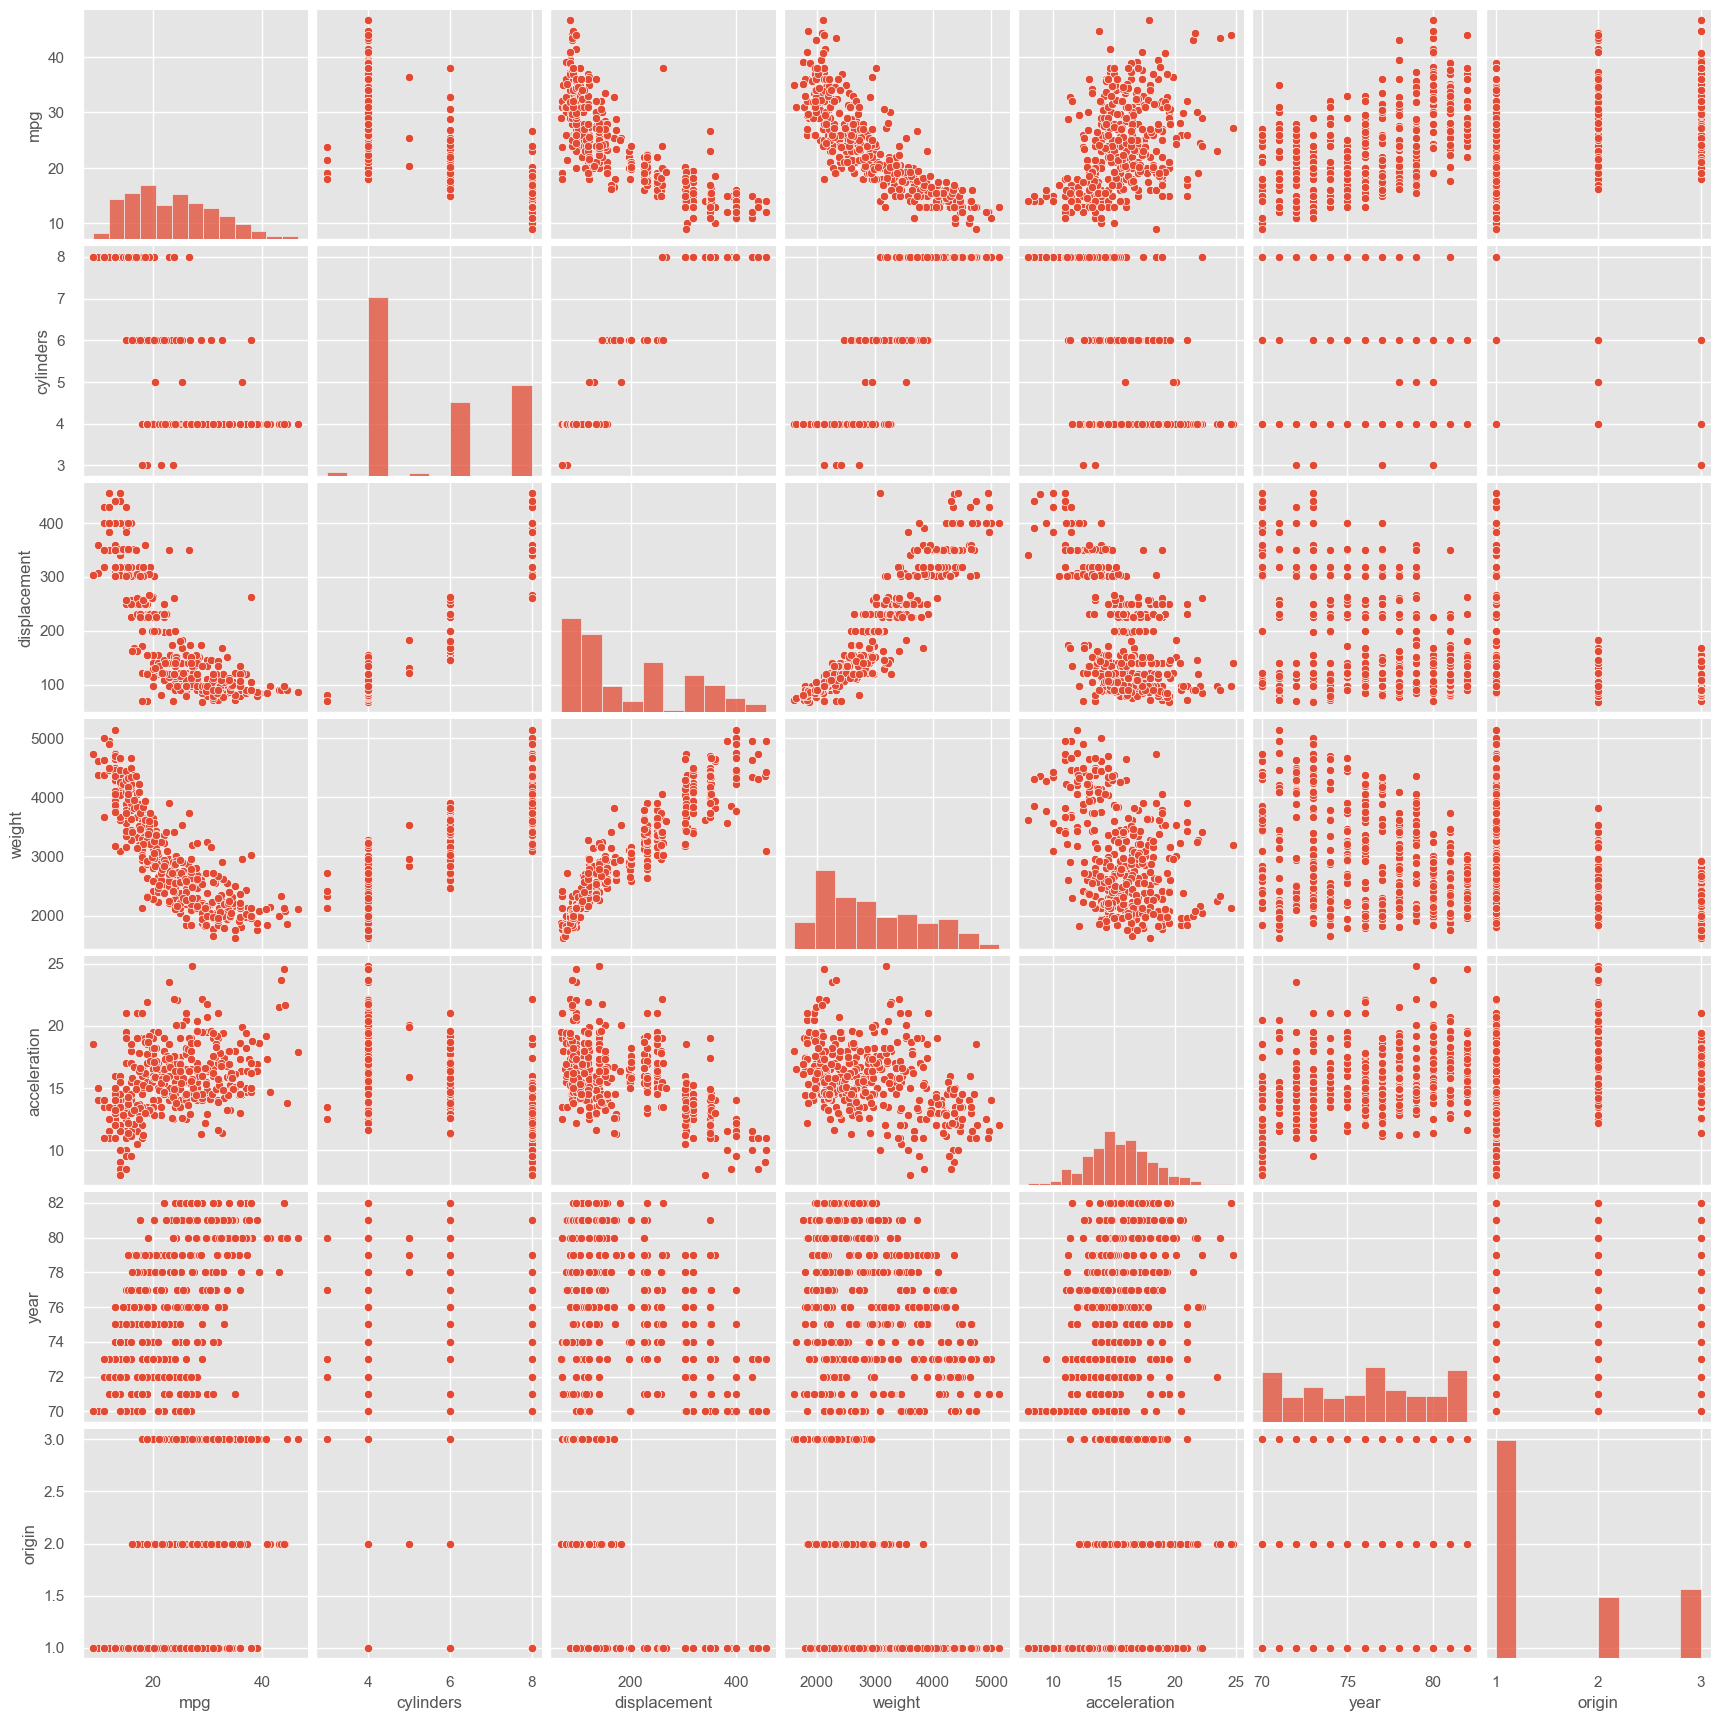

In [68]:
sns.pairplot(auto);

(b) Compute the matrix of correlations between the variables using the function cor(). You will need to exclude the name variable, which is qualitative.

In [38]:
auto.corr()

C:\Users\Tara Grey\AppData\Local\Temp\ipykernel_28532\668445388.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  auto.corr()


,mpg,cylinders,displacement,weight,acceleration,year,origin
mpg,1.000000,-0.776260,-0.804443,-0.831739,0.422297,0.581469,0.563698
cylinders,-0.776260,1.000000,0.950920,0.897017,-0.504061,-0.346717,-0.564972
displacement,-0.804443,0.950920,1.000000,0.933104,-0.544162,-0.369804,-0.610664
weight,-0.831739,0.897017,0.933104,1.000000,-0.419502,-0.307900,-0.581265
acceleration,0.422297,-0.504061,-0.544162,-0.419502,1.000000,0.282901,0.210084
year,0.581469,-0.346717,-0.369804,-0.307900,0.282901,1.000000,0.184314
origin,0.563698,-0.564972,-0.610664,-0.581265,0.210084,0.184314,1.000000


C:\Users\Tara Grey\AppData\Local\Temp\ipykernel_28532\491382973.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = auto.corr().abs()


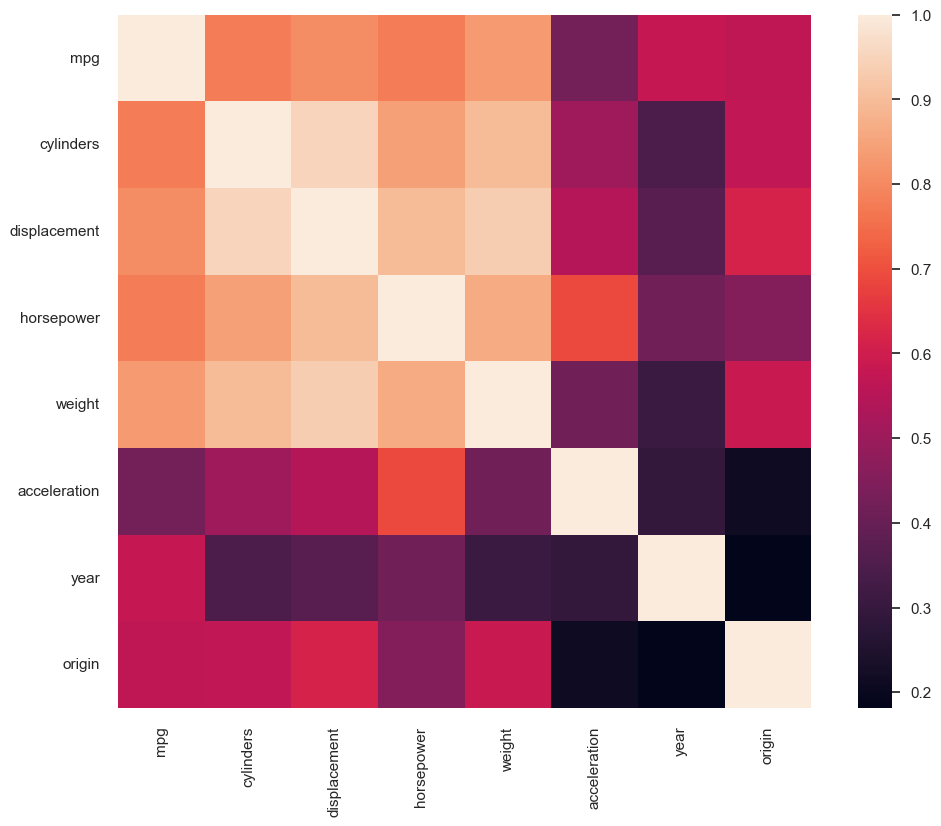

In [84]:
# Heatmap
corr_matrix = auto.corr().abs()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr_matrix, vmax=1, square=True)
plt.xticks(rotation=90)
plt.yticks(rotation=0);

(c) Perform a multiple linear regression with mpg as the response and all other variables except name as the predictors. Use the summary() function to print the results. Comment on the output. For instance:

1. Is there a relationship between the predictors and the response?
2. Which predictors appear to have a statistically significant relationship to the response?
3. What does the coefficient for the year variable suggest?



In [73]:
reg = smf.ols('mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + origin', auto).fit()
reg.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Wed, 21 Feb 2024   Prob (F-statistic):          2.04e-139
Time:                        14:09:58   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -17.2184      4.644     -3.707      0.000     -26.350      -8.087
cylinders       -0.4934      0.323     -1.526      0.128      -1.129       0.142
displacement     0.0199      0.008      2.647      0.008       0.005       0.035
horsepower      -0.0170      0.014     -1.230      0.220      -0.044       0.010
weight          -0.0065      0.001     -9.929      0.000      -0.008      -0.005
acceleration     0.0806      0.099      0.815      0.415      -0.114       0.275
year             0.7508      0.051     14.729      0.000       0.651       0.851
origin           1.4261      0.278      5.127      0.000       0.879       1.973
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                     8.59e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
model.pvalues[model.pvalues < 0.05].sort_values()

year              2.332943e-40
weight            6.375633e-22
C(origin)[T.3]    3.933208e-07
C(origin)[T.2]    4.720373e-06
Intercept         1.445124e-04
displacement      1.862685e-03
dtype: float64

## Comments: 
(i) Yes, there is a relationship between the predictors and the response

(ii) The predictors that appear statistically significant to the response are: displacement, weight, year, origin. 

(iii) The coefficient for the variable year suggests that newer models will have a higher mpg. 

## (d)
Use the plot() function to produce diagnostic plots of the linear regression fit. Comment on any problems you see with the fit. Do the residual plots suggest any unusually large outliers? Does the leverage plot identify any observations with unusually high leverage?

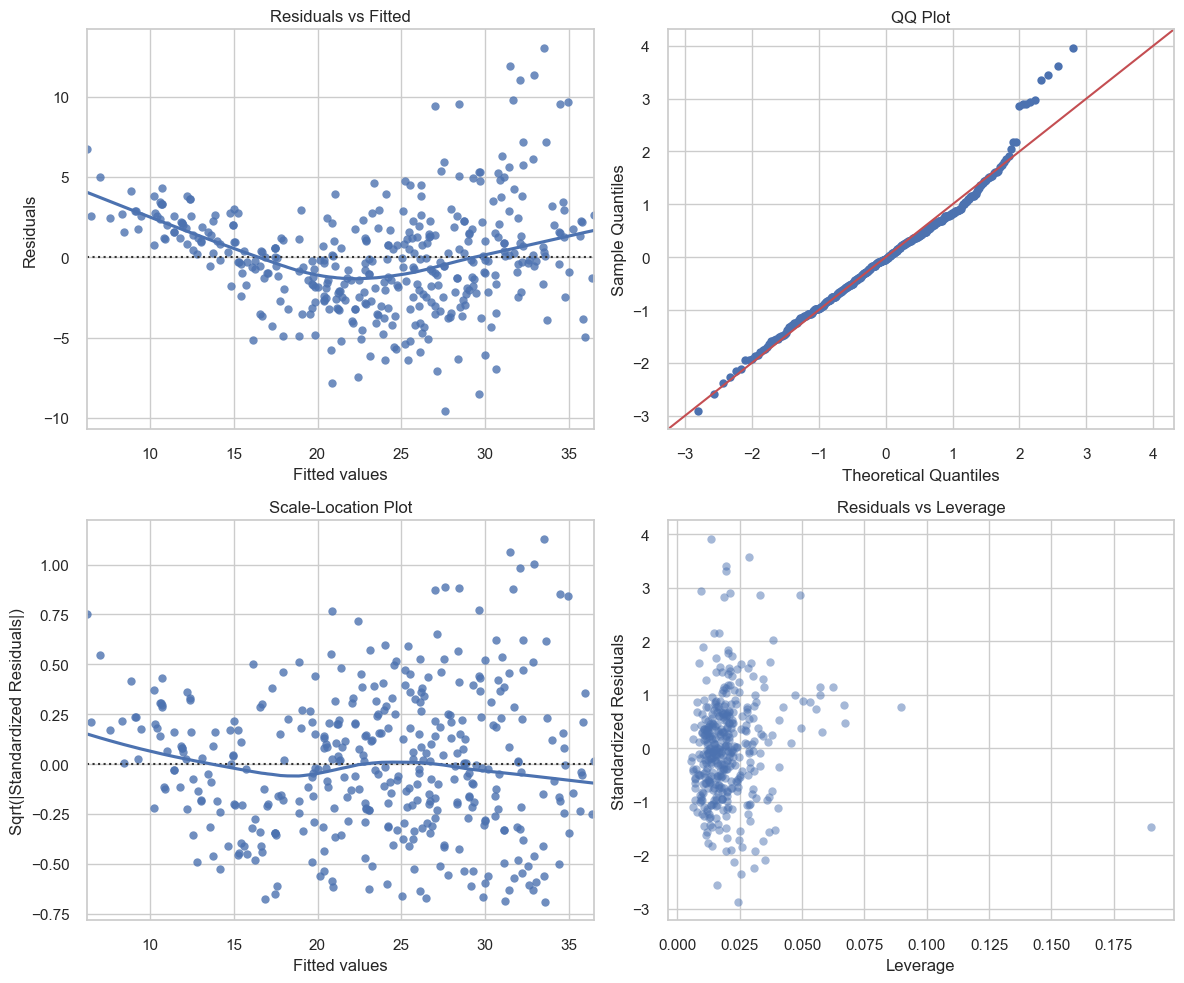

In [82]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you already have a fitted model named 'model_fit'

# Residuals vs Fitted plot
sns.set(style="whitegrid")
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

# Residuals vs Fitted
sns.residplot(x=model_fit.fittedvalues, y=model_fit.resid, lowess=True, ax=ax[0, 0])
ax[0, 0].set_title('Residuals vs Fitted')
ax[0, 0].set_xlabel('Fitted values')
ax[0, 0].set_ylabel('Residuals')

# QQ plot
sm.qqplot(model_fit.resid, fit=True, line="45", ax=ax[0, 1])
ax[0, 1].set_title('QQ Plot')

# Scale-Location plot
sns.residplot(x=model_fit.fittedvalues, y=np.sqrt(np.abs(model_fit.get_influence().resid_studentized_internal)), lowess=True, ax=ax[1, 0])
ax[1, 0].set_title('Scale-Location Plot')
ax[1, 0].set_xlabel('Fitted values')
ax[1, 0].set_ylabel('Sqrt(|Standardized Residuals|)')

# Residuals vs Leverage plot
sns.regplot(x=model_fit.get_influence().hat_matrix_diag, y=model_fit.resid_pearson, fit_reg=False, ax=ax[1, 1], scatter_kws={"alpha": 0.5})
ax[1, 1].set_title('Residuals vs Leverage')
ax[1, 1].set_xlabel('Leverage')
ax[1, 1].set_ylabel('Standardized Residuals')

plt.tight_layout()
plt.show()


In [99]:
import statsmodels.formula.api as smf
from statsmodels.graphics.gofplots import ProbPlot
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Set seaborn style
sns.set(style="whitegrid")

# Your existing code...

model_f = 'mpg ~ cylinders + \
                 displacement + \
                 horsepower + \
                 weight + \
                 acceleration + \
                 year + \
                 origin'

df.reset_index(drop=True, inplace=True)

model = smf.ols(formula=model_f, data=auto)

model_fit = model.fit()
# fitted values (need a constant term for intercept)
model_fitted_y = model_fit.fittedvalues

# model residuals
model_residuals = model_fit.resid

# normalized residuals
model_norm_residuals = model_fit.get_influence().resid_studentized_internal

# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

# absolute residuals
model_abs_resid = np.abs(model_residuals)

# leverage, from statsmodels internals
model_leverage = model_fit.get_influence().hat_matrix_diag

# cook's distance, from statsmodels internals
model_cooks = model_fit.get_influence().cooks_distance[0]


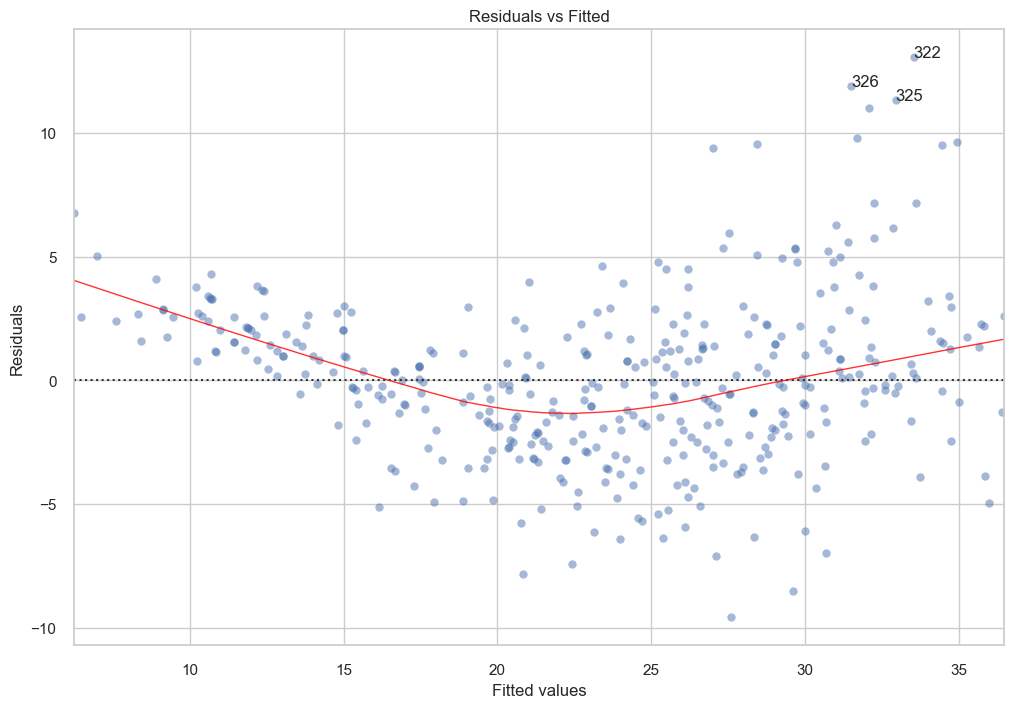

In [100]:
plot_lm_1 = plt.figure(1)
plot_lm_1.set_figheight(8)
plot_lm_1.set_figwidth(12)

# Access the axes correctly
sns.residplot(x=model_fitted_y, y='mpg', data=auto,
              lowess=True,
              scatter_kws={'alpha': 0.5},
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

# Set title and labels
plt.title('Residuals vs Fitted')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')

# Annotations
abs_resid = model_abs_resid.sort_values(ascending=False)
abs_resid_top_3 = abs_resid[:3]

for i in abs_resid_top_3.index:
    plt.annotate(i, 
                 xy=(model_fitted_y[i], model_residuals[i]))

# Show the plot
plt.show()


## Comments: 

- In the residual plots the fit does not appear accurate because there is a obvious curve pattern to the residual plots. From the leverage plot, point 14 seems to have high leverage but not a high magnitude residual. 

- There are possible outliers in the plot of studentized residuals because some data poins have a value larger than 3. 

## (e) 
- Fit some models with interactions as described in the lab. Do
any interactions appear to be statistically significant?

In [91]:
model3a = smf.ols(formula='mpg ~ displacement*weight + year', data=auto) 
print(model3a.fit().summary())
model3b = smf.ols(formula='mpg ~ displacement + weight + origin:year', data=auto) 
print(model3b.fit().summary())
model3c = smf.ols(formula='mpg ~ displacement + acceleration*weight + year + origin', data=auto) 
print(model3c.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     556.4
Date:                Wed, 21 Feb 2024   Prob (F-statistic):          5.50e-159
Time:                        15:51:28   Log-Likelihood:                -986.90
No. Observations:                 392   AIC:                             1984.
Df Residuals:                     387   BIC:                             2004.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -6.3791    

## Comments: 
- Using the highest correlated pairs from the correlation matrix in part b and used them to be interaction effects. From the tables above with the p-values, it can be assumed that there is significant interaction between displacement and weight, but the interaction between cyliders and displacement is not significant. 

## (f) ## 
- Try a few different transformations of the variables, such as log(X), √X, X2. Comment on your findings

In [95]:
model3d = smf.ols(formula='mpg ~ displacement + np.log(weight) + year', data=auto) 
print(model3d.fit().summary())
model3e = smf.ols(formula='mpg ~ displacement + np.sqrt(weight) + year + origin', data=auto) 
print(model3e.fit().summary())
# raw polynomial terms
model3fa = smf.ols(formula='mpg ~ displacement + weight + I(weight**2)', data=auto) 
print(model3fa.fit().summary())
# orthogonal polynomial terms
def poly(x, p):
    x = np.array(x)
    X = np.transpose(np.vstack((x**k for k in range(p+1))))
    return np.linalg.qr(X)[0][:,1:]

auto['weight1'] = poly(auto.weight, 2)[:,0]
auto['weight2'] = poly(auto.weight, 2)[:,1]

model3fb = smf.ols(formula='mpg ~ displacement + weight1 + weight2', data=auto) 
print(model3fb.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     669.1
Date:                Wed, 21 Feb 2024   Prob (F-statistic):          6.26e-153
Time:                        15:56:00   Log-Likelihood:                -1004.4
No. Observations:                 392   AIC:                             2017.
Df Residuals:                     388   BIC:                             2033.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        138.7405     10.996     12.

C:\Users\Tara Grey\AppData\Local\Temp\ipykernel_28532\3113709242.py:11: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  X = np.transpose(np.vstack((x**k for k in range(p+1))))
C:\Users\Tara Grey\AppData\Local\Temp\ipykernel_28532\3113709242.py:11: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  X = np.transpose(np.vstack((x**k for k in range(p+1))))


## Comments: 
- 

## Question 10

In [7]:
# Upload dataset
carseats = pd.read_csv("Carseats.csv", index_col = ["Unnamed: 0"])
carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
4,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
5,4.15,141,64,3,340,128,Bad,38,13,Yes,No


## (a)

In [8]:
# Fit multiple regession model to predict sales using price, Urban and US
model1 = smf.ols(formula='Sales ~ Price + Urban + US', data=carseats) 
print(model1.fit().summary())
print('RSE = %.3f' %np.sqrt(model1.fit().scale))

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Wed, 21 Feb 2024   Prob (F-statistic):           2.39e-23
Time:                        21:19:45   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       13.0435      0.651     20.036   

# (b)
Provide an interpretation of each coefficient in the model. Be careful—some of the variables in the model are qualitative!



- Sales are 0.022 lower for the Urban areas. WHich means that the model predicts, whith car seat price constant and considering the value of US, that urdban areas on average have aprrox. 22 fewer car seat sales compared to non-urban areas. 
- Sales are 1.201 higher in the US, which means that on avearge stores in the US have 1201 more car sales compared to stores outside of the US. 
- Sales drop by 0.054 for each dollar increase in Price. Therefore 1 dollar increase in the price of a car seat that is associated with a decrease of aprrox 54.46 units in sales on average, according to the model. 

## (c) 
Write out the model in equation form, being careful to handle the qualitative variables properly

Sales = (13.043 - 0.054) x Price - (0.022 x UrbanYes) + (1.201 x USYes)

## (d)
For which of the predictors can you reject the null hypothesis
H0 : βj = 0?

 - Price and USYes are two predictors that you can reject the null hypothesis. FOr the p-values for the intercept of Price and USYes are all almost zero, which give strong evidence to reject the null Hypothesis that: βj = 0 for these two predictors. 

## (e)
On the basis of your response to the previous question, fit a
smaller model that only uses the predictors for which there is
evidence of association with the outcome.

In [9]:
import statsmodels.formula.api as smf

model2 = smf.ols(formula='Sales ~ Price + US', data=carseats) 
print(model2.fit().summary())
print('RSE = %.3f' %np.sqrt(model2.fit().scale))

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Wed, 21 Feb 2024   Prob (F-statistic):           2.66e-24
Time:                        21:19:51   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.0308      0.631     20.652      0.0

## (f)
How well do the models in (a) and (e) fit the data?

- The models in Part 1 and Part 5 both fit the data about equally well, with almsot identical R2 values of 0.235 for model2 and 0.234 for model 1. In addition, when RSE values model 1 has a RSE = 2.472 and model 2 has a RSE = 2.469. 

## (g)
Using the model from (e), obtain 95 % confidence intervals for the coefficient(s).

In [30]:
model2.fit().conf_int(alpha=0.05)

,0,1
Intercept,11.79032,14.271265
US[T.Yes],0.69152,1.707766
Price,-0.06476,-0.044195


## (h)
Is there evidence of outliers or high leverage observations in the
model from (e)?

In [16]:
model2_fit = model2.fit()
# fitted values
model2_fitted_y = model2_fit.fittedvalues
# normalized residuals
model2_norm_residuals = model2_fit.get_influence().resid_studentized_internal
# absolute squared normalized residuals
model2_norm_residuals_abs_sqrt = np.sqrt(np.abs(model2_norm_residuals))
# leverage, from statsmodels internals
model2_leverage = model2_fit.get_influence().hat_matrix_diag

Text(0, 0.5, 'Residuals')

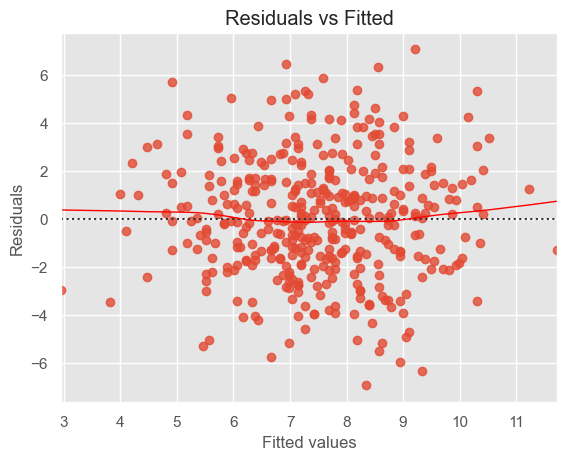

In [20]:
# plot 1: residuals vs. fitted values 
plot1 = plt.figure(1)
sns.residplot(x=model2_fitted_y, y=carseats['Sales'], lowess=True, line_kws={'color':'red', 'lw':1})
plot1.axes[0].set_title('Residuals vs Fitted')
plot1.axes[0].set_xlabel('Fitted values')
plot1.axes[0].set_ylabel('Residuals')

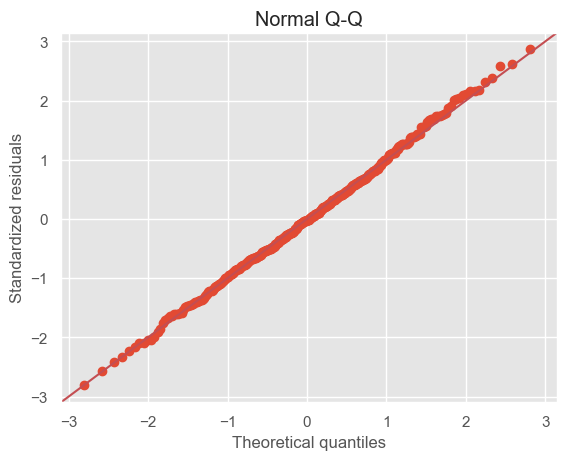

In [18]:
# plot 2: normal Q-Q
plot2 = sm.qqplot(model2_norm_residuals, fit=True, line='45')
plot2.axes[0].set_title('Normal Q-Q')
plot2.axes[0].set_xlabel('Theoretical quantiles')
plot2.axes[0].set_ylabel('Standardized residuals');

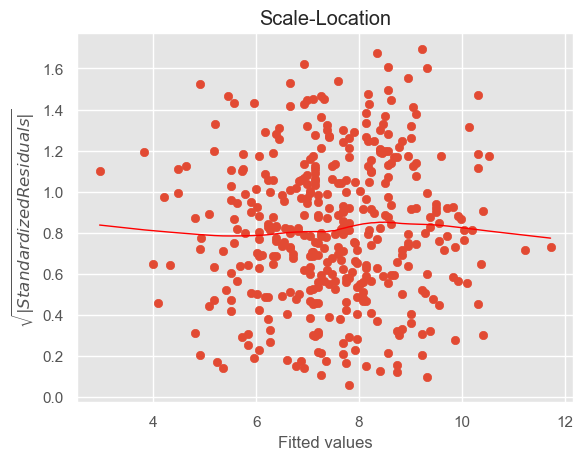

In [22]:
plot3 = plt.figure(3)

# Scatter plot
plt.scatter(model2_fitted_y, model2_norm_residuals_abs_sqrt)

# Regression line
sns.regplot(x=model2_fitted_y, y=model2_norm_residuals_abs_sqrt, scatter=False, ci=False, lowess=True, line_kws={'color':'red', 'lw':1})

plot3.axes[0].set_title('Scale-Location')
plot3.axes[0].set_xlabel('Fitted values')
plot3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$');


Text(0, 0.5, 'Standardized residuals')

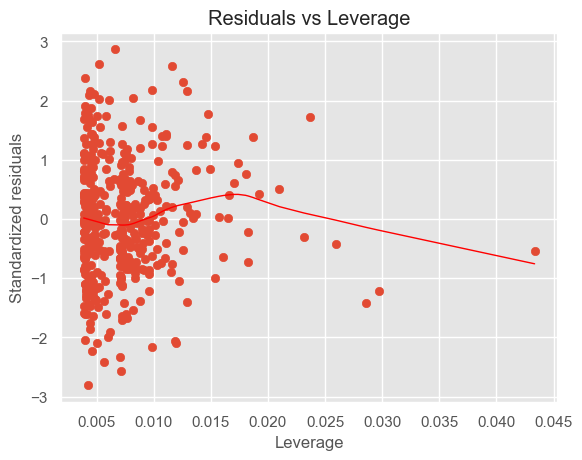

In [24]:
# plot 4: residuals vs. leverage
plot4 = plt.figure(4)

# Scatter plot
plt.scatter(model2_leverage, model2_norm_residuals)

# Regression line
sns.regplot(x=model2_leverage, y=model2_norm_residuals, scatter=False, ci=False, lowess=True, line_kws={'color':'red', 'lw':1})

plot4.axes[0].set_title('Residuals vs Leverage')
plot4.axes[0].set_xlabel('Leverage')
plot4.axes[0].set_ylabel('Standardized residuals')


## Comment: 
- Residuals plot look good with no obvious outliers and the data appears to be normal.

## Question 12
- This problem involves simple linear regression without an intercept.

## (a) 
Recall that the coefficient estimate ˆβ for the linear regression of
Y onto X without an intercept is given by (3.38). Under what
circumstance is the coefficient estimate for the regression of X
onto Y the same as the coefficient estimate for the regression of
Y onto X?

- As the numerator in the formula for ^β is symmetrical with respect to X and Y, the regression coefficient estimate for predicting X from Y will be identical to the coefficient estimate for predicting Y from X when the sum of squared values of X equals the sum of squared values of Y.

## (b)
Generate an example in Python with n = 100 observations in
which the coefficient estimate for the regression of X onto Y
is different from the coefficient estimate for the regression of Y
onto X.

In [32]:
np.random.seed(1)
x = np.random.normal(loc = 0.0, scale = 1.0, size = (100, 1))
y = 3*x + np.random.normal(loc = 0.0, scale = 1.0, size = (100, 1))

In [33]:


# Using StatsModels for regression of y onto x
mod_y_onto_x = sm.OLS(y, x)
res_y_onto_x = mod_y_onto_x.fit()
print(res_y_onto_x.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.896
Model:                            OLS   Adj. R-squared (uncentered):              0.895
Method:                 Least Squares   F-statistic:                              851.8
Date:                Wed, 21 Feb 2024   Prob (F-statistic):                    1.97e-50
Time:                        21:42:36   Log-Likelihood:                         -135.67
No. Observations:                 100   AIC:                                      273.3
Df Residuals:                      99   BIC:                                      275.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [36]:
model1     = sm.OLS(y,x)
model1_fit = model1.fit()
print(model1_fit.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.896
Model:                            OLS   Adj. R-squared (uncentered):              0.895
Method:                 Least Squares   F-statistic:                              851.8
Date:                Wed, 21 Feb 2024   Prob (F-statistic):                    1.97e-50
Time:                        21:45:05   Log-Likelihood:                         -135.67
No. Observations:                 100   AIC:                                      273.3
Df Residuals:                      99   BIC:                                      275.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [37]:
model2 = sm.OLS(x,y)
model2_fit = model2.fit()
print(model2_fit.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.896
Model:                            OLS   Adj. R-squared (uncentered):              0.895
Method:                 Least Squares   F-statistic:                              851.8
Date:                Wed, 21 Feb 2024   Prob (F-statistic):                    1.97e-50
Time:                        21:45:14   Log-Likelihood:                         -16.817
No. Observations:                 100   AIC:                                      35.63
Df Residuals:                      99   BIC:                                      38.24
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [38]:
x2 = sm.add_constant(x)
y2 = sm.add_constant(y) 

In [39]:
model3 = sm.OLS(y,x2)
model3_fit = model3.fit()
print(model3_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     854.0
Date:                Wed, 21 Feb 2024   Prob (F-statistic):           3.51e-50
Time:                        21:45:41   Log-Likelihood:                -134.44
No. Observations:                 100   AIC:                             272.9
Df Residuals:                      98   BIC:                             278.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1470      0.094      1.564      0.1

In [40]:
model4     = sm.OLS(x,y2)
model4_fit = model4.fit()
print(model4_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     854.0
Date:                Wed, 21 Feb 2024   Prob (F-statistic):           3.51e-50
Time:                        21:45:47   Log-Likelihood:                -16.014
No. Observations:                 100   AIC:                             36.03
Df Residuals:                      98   BIC:                             41.24
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0364      0.029     -1.259      0.2

## (c)
Generate an example in Python with n = 100 observations in
which the coefficient estimate for the regression of X onto Y is
the same as the coefficient estimate for the regression of Y onto
X.

In [41]:
np.random.seed(2)
x = np.random.normal(1000, 0.01, size=(100,1))
y = np.random.normal(1000, 0.01, size=(100,1))


In [44]:
model_5     = sm.OLS(y,x)
model_5_fit = model_5.fit()
print(model_5_fit.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          4.433e+11
Date:                Wed, 21 Feb 2024   Prob (F-statistic):                        0.00
Time:                        21:50:10   Log-Likelihood:                          278.45
No. Observations:                 100   AIC:                                     -554.9
Df Residuals:                      99   BIC:                                     -552.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [45]:
model_6     = sm.OLS(x,y)
model_6_fit = model_6.fit()
print(model_6_fit.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          4.433e+11
Date:                Wed, 21 Feb 2024   Prob (F-statistic):                        0.00
Time:                        21:50:31   Log-Likelihood:                          278.45
No. Observations:                 100   AIC:                                     -554.9
Df Residuals:                      99   BIC:                                     -552.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------